In [1]:
import numpy as np

# mass of solar system bodies in kg
mass = {'Sun': 1.989e30, 'Venus': 4.87e24, 'Earth': 5.97e24, 
             'Mars': 0.642e24, 'Jupiter': 1898e24, 'Saturn': 568e24, 
             'Titan': 0.1345e24}

# distance from sun in km
distance = {'Venus': 108.2e6, 'Earth': 149.6e6, 'Mars': 227.9e6,
             'Jupiter': 778.6e6, 'Saturn': 1433.5e6}

# initial radial degree 
initial_deg = {'Venus': 14.22, 'Earth': 219.09, 'Mars': 229.93, 
                'Jupiter': 172.26, 'Saturn': 252.77}

# orbital velocities in km/day
orbital_velocity = {'Venus': 1.9414e7, 'Earth': 3.15533e7, 'Mars': 5.93568e7, 
                   'Jupiter': 7.05542e7, 'Saturn': 1.308528e8}

def position_components(deg, distance):
    """converts polar coordinates to cartesian coordinates for position
    Input:
    ------
    deg
        angle in degrees
    distance
        distance from sun to planet (used for conversion calculation)
        
    Output:
    -------
    x, y
        x and y coordinates where sun is at origin
    """
    rad = np.deg2rad(deg)
    x = distance*np.cos(rad)
    y = distance*np.sin(rad)
    return np.array([x, y])

def velocity_components(deg, orbital_velocity):
    """converts tangential velocity to cartesian components with respect to sun
    Input:
    ------
    deg
        angle of planet in degrees
    orbital velocity
        orbital velocity of selected planet
        
    Output:
    -------
    x, y
        x and y coordinates where sun is at origin
    """
    phi = deg + 90
    rad = np.deg2rad(phi)
    vx = orbital_velocity*np.sin(rad)
    vy = orbital_velocity*np.cos(rad)
    return vx, vy

def initial_velocity(angle, distance, period):
  
    x = np.deg2rad(angle)
    return (2*np.pi*distance * np.array([np.sin(x), -np.cos(x)])) / period 
    
def F_gravity(r, m, M):
    G_grav = 5e-10
    rr = np.sum(r*r)
    r_hat = r/np.sqrt(rr)
    return -G_grav* m * M/rr * r_hat

def integrate_all_orbits(t_max=3650):
    """worry about description later"""
    r0 = np.zeros((5, 2))
    v0 = np.zeros_like(r0)
    
    dt = 0.1
    Nsteps = int(t_max/dt)
    t = dt*np.linspace(0, t_max, Nsteps)
    
    r0[0] = position_components(initial_deg['Venus'], distance['Venus'])
    r0[1] = position_components(initial_deg['Earth'], distance['Earth'])
    r0[2] = position_components(initial_deg['Mars'], distance['Mars'])
    r0[3] = position_components(initial_deg['Jupiter'], distance['Jupiter'])
    r0[4] = position_components(initial_deg['Saturn'], distance['Saturn'])
    
    v0[0] = initial_velocity(initial_deg['Venus'], distance['Venus'], 243)
    v0[1] = initial_velocity(initial_deg['Earth'], distance['Earth'], 365)
    v0[2] = initial_velocity(initial_deg['Mars'], distance['Mars'], 686)
    v0[3] = initial_velocity(initial_deg['Jupiter'], distance['Jupiter'], 4332)
    v0[4] = initial_velocity(initial_deg['Saturn'], distance['Saturn'], 10775)
    
    r = np.zeros([Nsteps, 5, 2])
    v = np.zeros_like(r)
    
    for i in range(0, 5):
        r[0, i, :] = r0[i]
        v[0, i, :] = v0[i]
    
    Ft_0 = (F_gravity(r[0, 0], mass['Venus'], mass['Sun']) + 
            F_gravity(r[0, 0]-r[0, 1], mass['Venus'], mass['Earth']) + 
            F_gravity(r[0, 0]-r[0, 2], mass['Venus'], mass['Mars']) + 
            F_gravity(r[0, 0]-r[0, 3], mass['Venus'], mass['Jupiter']) + 
            F_gravity(r[0, 0]-r[0, 4], mass['Venus'], mass['Saturn']))
    Ft_1 = (F_gravity(r[0, 1], mass['Earth'], mass['Sun']) + 
            F_gravity(r[0, 1]-r[0, 0], mass['Earth'], mass['Venus']) + 
            F_gravity(r[0, 1]-r[0, 2], mass['Earth'], mass['Mars']) + 
            F_gravity(r[0, 1]-r[0, 3], mass['Earth'], mass['Jupiter']) + 
            F_gravity(r[0, 1]-r[0, 4], mass['Earth'], mass['Saturn']))
    Ft_2 = (F_gravity(r[0, 2], mass['Mars'], mass['Sun']) + 
            F_gravity(r[0, 2]-r[0, 0], mass['Mars'], mass['Venus']) + 
            F_gravity(r[0, 2]-r[0, 1], mass['Mars'], mass['Earth']) + 
            F_gravity(r[0, 2]-r[0, 3], mass['Mars'], mass['Jupiter']) + 
            F_gravity(r[0, 2]-r[0, 4], mass['Mars'], mass['Saturn']))
    Ft_3 = (F_gravity(r[0, 3], mass['Jupiter'], mass['Sun']) + 
            F_gravity(r[0, 3]-r[0, 0], mass['Jupiter'], mass['Venus']) + 
            F_gravity(r[0, 3]-r[0, 1], mass['Jupiter'], mass['Earth']) + 
            F_gravity(r[0, 3]-r[0, 2], mass['Jupiter'], mass['Mars']) + 
            F_gravity(r[0, 3]-r[0, 4], mass['Jupiter'], mass['Saturn']))
    Ft_4 = (F_gravity(r[0, 4], mass['Saturn'], mass['Sun']) + 
            F_gravity(r[0, 4]-r[0, 0], mass['Saturn'], mass['Venus']) + 
            F_gravity(r[0, 4]-r[0, 1], mass['Saturn'], mass['Earth']) + 
            F_gravity(r[0, 4]-r[0, 2], mass['Saturn'], mass['Mars']) + 
            F_gravity(r[0, 4]-r[0, 3], mass['Saturn'], mass['Jupiter']))
    
    for i in range(Nsteps-1):
        v_half_0 = v[i, 0] + 0.5*dt*Ft_0/mass['Venus']
        v_half_1 = v[i, 1] + 0.5*dt*Ft_1/mass['Earth']
        v_half_2 = v[i, 2] + 0.5*dt*Ft_2/mass['Mars']
        v_half_3 = v[i, 3] + 0.5*dt*Ft_3/mass['Jupiter']
        v_half_4 = v[i, 4] + 0.5*dt*Ft_4/mass['Saturn']
        r[i+1, 0] = r[i, 0] + dt*v_half_0
        r[i+1, 1] = r[i, 1] + dt*v_half_1
        r[i+1, 2] = r[i, 2] + dt*v_half_2
        r[i+1, 3] = r[i, 3] + dt*v_half_3
        r[i+1, 4] = r[i, 4] + dt*v_half_4
        Ft_next_0 = (F_gravity(r[i+1, 0], mass['Venus'], mass['Sun']) + 
            F_gravity(r[i+1, 0]-r[i+1, 1], mass['Venus'], mass['Earth']) + 
            F_gravity(r[i+1, 0]-r[i+1, 2], mass['Venus'], mass['Mars']) + 
            F_gravity(r[i+1, 0]-r[i+1, 3], mass['Venus'], mass['Jupiter']) + 
            F_gravity(r[i+1, 0]-r[i+1, 4], mass['Venus'], mass['Saturn']))
        Ft_next_1 = (F_gravity(r[i+1, 1], mass['Earth'], mass['Sun']) + 
            F_gravity(r[i+1, 1]-r[i+1, 0], mass['Earth'], mass['Venus']) + 
            F_gravity(r[i+1, 1]-r[i+1, 2], mass['Earth'], mass['Mars']) + 
            F_gravity(r[i+1, 1]-r[i+1, 3], mass['Earth'], mass['Jupiter']) + 
            F_gravity(r[i+1, 1]-r[i+1, 4], mass['Earth'], mass['Saturn']))
        Ft_next_2 = (F_gravity(r[i+1, 2], mass['Mars'], mass['Sun']) + 
            F_gravity(r[i+1, 2]-r[i+1, 0], mass['Mars'], mass['Venus']) + 
            F_gravity(r[i+1, 2]-r[i+1, 1], mass['Mars'], mass['Earth']) + 
            F_gravity(r[i+1, 2]-r[i+1, 3], mass['Mars'], mass['Jupiter']) + 
            F_gravity(r[i+1, 2]-r[i+1, 4], mass['Mars'], mass['Saturn']))
        Ft_next_3 = (F_gravity(r[i+1, 3], mass['Jupiter'], mass['Sun']) + 
            F_gravity(r[i+1, 3]-r[i+1, 0], mass['Jupiter'], mass['Venus']) + 
            F_gravity(r[i+1, 3]-r[i+1, 1], mass['Jupiter'], mass['Earth']) + 
            F_gravity(r[i+1, 3]-r[i+1, 2], mass['Jupiter'], mass['Mars']) + 
            F_gravity(r[i+1, 3]-r[i+1, 4], mass['Jupiter'], mass['Saturn']))
        Ft_next_4 = (F_gravity(r[i+1, 4], mass['Saturn'], mass['Sun']) + 
            F_gravity(r[i+1, 4]-r[i+1, 0], mass['Saturn'], mass['Venus']) + 
            F_gravity(r[i+1, 4]-r[i+1, 1], mass['Saturn'], mass['Earth']) + 
            F_gravity(r[i+1, 4]-r[i+1, 2], mass['Saturn'], mass['Mars']) + 
            F_gravity(r[i+1, 4]-r[i+1, 3], mass['Saturn'], mass['Jupiter']))
        
        v[i+1, 0] = v_half_0 + 0.5*dt*Ft_next_0/mass['Venus']
        v[i+1, 1] = v_half_1 + 0.5*dt*Ft_next_1/mass['Earth']
        v[i+1, 2] = v_half_2 + 0.5*dt*Ft_next_2/mass['Mars']
        v[i+1, 3] = v_half_3 + 0.5*dt*Ft_next_3/mass['Jupiter']
        v[i+1, 4] = v_half_4 + 0.5*dt*Ft_next_4/mass['Saturn']
        Ft_0 = Ft_next_0
        Ft_1 = Ft_next_1
        Ft_2 = Ft_next_2
        Ft_3 = Ft_next_3
        Ft_4 = Ft_next_4
    
    return r, v

In [4]:
r, v = integrate_all_orbits(t_max=3000)

In [6]:
r[0:10, 0, :]

array([[  1.04884715e+08,   2.65788724e+07],
       [  1.06766219e+08,   2.61018714e+07],
       [  1.08646922e+08,   2.56246749e+07],
       [  1.10526849e+08,   2.51472951e+07],
       [  1.12406020e+08,   2.46697437e+07],
       [  1.14284459e+08,   2.41920312e+07],
       [  1.16162184e+08,   2.37141678e+07],
       [  1.18039216e+08,   2.32361630e+07],
       [  1.19915574e+08,   2.27580254e+07],
       [  1.21791277e+08,   2.22797633e+07]])

Simulating Venus, Earth, Mars, Jupiter, and Saturn orbits


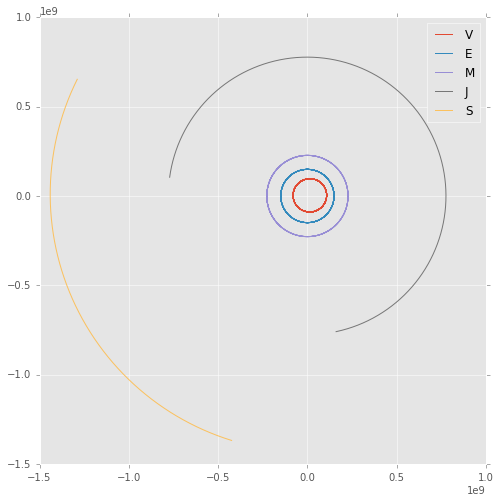

In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline


print("Simulating Venus, Earth, Mars, Jupiter, and Saturn orbits")

rV = r[:, 0, :]
rE = r[:, 1, :]
rM = r[:, 2, :]
rJ = r[:, 3, :]
rS = r[:, 4, :]
vV = v[:, 0, :]
    
plt.figure(figsize=(8,8))
plt.plot(rV[:, 0], rV[:, 1], label="V")
plt.plot(rE[:, 0], rE[:, 1], label="E")
plt.plot(rM[:, 0], rM[:, 1], label="M")
plt.plot(rJ[:, 0], rJ[:, 1], label="J")
plt.plot(rS[:, 0], rS[:, 1], label="S")
plt.legend(loc='best')